In [68]:
# importing required libraries
import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading dataset from local system

In [69]:
loan = pd.read_csv("loan.csv", low_memory=False)

In [70]:
# Determining the shape of the datset

loan.shape

(39717, 111)

In [71]:
# Removing columns those do not have data
loan = loan.dropna(axis=1, how='all')
loan.shape

(39717, 57)

In [72]:
# Removing columns those have 0 value more then 30%
drop_cols = loan.columns[(loan == 0).sum() > 0.30*loan.shape[1]]
loan.drop(drop_cols, axis = 1, inplace = True) 
loan.shape

(39717, 34)

In [73]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol=loan.isnull().sum()

emptycol =emptycol[emptycol.values>(0.3*loan.shape[0])]
len(emptycol)

2

In [74]:
# Removing those 2 columns
loan.drop(labels=emptycol.keys(),axis=1,inplace=True)
print(len(emptycol))

2


In [75]:
# Checking the columns having less null percentage

loan.isnull().sum()/len(loan)*100

id                     0.000000
member_id              0.000000
loan_amnt              0.000000
funded_amnt            0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.191303
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
pymnt_plan             0.000000
url                    0.000000
purpose                0.000000
title                  0.027696
zip_code               0.000000
addr_state             0.000000
earliest_cr_line       0.000000
open_acc               0.000000
revol_util             0.125891
total_acc              0.000000
initial_list_status    0.000000
total_pymnt            0.000000
last_pymnt_d           0.178765
last_credit_pull_d     0.005036
policy_code            0.000000
applicat

 So, following columns have some null values. 
 <dl>
<dd>1) emp_title</dd>
<dd>2) emp_length</dd>
<dd>3) title</dd>
<dd>4) revol_util</dd>
<dd>5) last_pymnt_d</dd>    
</dl>

Lets try to fill them

In [76]:
# fill emp_title null values with others
loan.emp_title.fillna("Others", inplace = True)
loan.emp_title.isna().sum()

0

In [77]:
#fill emp_length with median
loan.emp_length.fillna(loan.emp_length.mean, inplace = True)
loan.emp_length.isna().sum()

0

In [78]:
# fill title null values with other
loan.title.fillna("Others", inplace = True)
loan.title.isna().sum()

0

In [79]:
# Convert revol_util to float data and fill na with median
loan.revol_util = loan.revol_util.str.slice(0, -1).map(lambda x :float(x))
loan.revol_util.fillna(loan.revol_util.mean, inplace = True)
loan.revol_util.isna().sum()

0

In [81]:
# fill last_pymnt_d mean value and convert it to date format
loan.last_pymnt_d.fillna(pd.to_datetime(loan.last_pymnt_d, format="%d-%b").mean(), inplace = True)


In [83]:
loan.last_credit_pull_d.fillna(pd.to_datetime(loan.last_credit_pull_d, format="%d-%b").mean(), inplace = True)

In [84]:
# Checking the columns having less null percentage

loan.isnull().sum()/len(loan)*100

id                     0.0
member_id              0.0
loan_amnt              0.0
funded_amnt            0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_title              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
pymnt_plan             0.0
url                    0.0
purpose                0.0
title                  0.0
zip_code               0.0
addr_state             0.0
earliest_cr_line       0.0
open_acc               0.0
revol_util             0.0
total_acc              0.0
initial_list_status    0.0
total_pymnt            0.0
last_pymnt_d           0.0
last_credit_pull_d     0.0
policy_code            0.0
application_type       0.0
dtype: float64

In [85]:
loan.shape

(39717, 32)

In [86]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   term                 39717 non-null  object 
 5   int_rate             39717 non-null  object 
 6   installment          39717 non-null  float64
 7   grade                39717 non-null  object 
 8   sub_grade            39717 non-null  object 
 9   emp_title            39717 non-null  object 
 10  emp_length           39717 non-null  object 
 11  home_ownership       39717 non-null  object 
 12  annual_inc           39717 non-null  float64
 13  verification_status  39717 non-null  object 
 14  issue_d              39717 non-null  object 
 15  loan_status          39717 non-null 

### Columns that cannot be analysed because of unstructed type of data

In [88]:
loan.title.describe() # too many unqiue values

count                  39717
unique                 19615
top       Debt Consolidation
freq                    2184
Name: title, dtype: object

In [89]:
loan.emp_title.describe()# too many unqiue values

count      39717
unique     28821
top       Others
freq        2459
Name: emp_title, dtype: object

In [90]:
loan.url.describe()# too many unqiue values

count                                                 39717
unique                                                39717
top       https://lendingclub.com/browse/loanDetail.acti...
freq                                                      1
Name: url, dtype: object

In [91]:
loan.zip_code.describe()# too many unqiue values

count     39717
unique      823
top       100xx
freq        597
Name: zip_code, dtype: object

In [92]:
loan.policy_code.describe()# only one type of value

count    39717.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: policy_code, dtype: float64

In [93]:
loan.application_type.describe()# only one type of value

count          39717
unique             1
top       INDIVIDUAL
freq           39717
Name: application_type, dtype: object

In [96]:
loan.addr_state.describe()# only one type of value

count     39717
unique       50
top          CA
freq       7099
Name: addr_state, dtype: object

In [ ]:
loan.add.describe()# only one type of value

In [31]:
# We will remove unwanted columns from this dataset

unwanted=['url','zip_code','policy_code','application_type','member_id','id','title','emp_title','initial_list_status']

loan.drop(labels=unwanted,axis=1,inplace=True)

In [32]:
# Convert revol_util to float
loan.revol_util = loan.revol_util.str.slice(0, -1).map(lambda x :float(x))

In [33]:
# Convert interest rate to float
loan.int_rate = loan.int_rate.str.slice(0, -1).map(lambda x :float(x))

In [53]:
##### Derived Metrics

##### Now, Creating bins for continous variable categories column 'annual_inc' and 'loan_amnt'

In [35]:
# Creating bins for income amount and save to income group

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

loan['annual_inc_range'] =pd.cut(loan.annual_inc,bins,labels=slot)

In [36]:
# Creating bins for loan amount

bins = [0,2500,5000,7500,10000,12500,15000,17500,20000,22500,25000,27500,30000,32500,35000]
slot = ['0-2500', '2500-5000','5000-7500','7500-10000','10000-12500', '12500-15000', '15000-17500','17500-20000',
       '20000-22500','22500-25000','25000-27500','27500-30000','30000-32500','32500 and above']

loan['loan_amnt_rang'] =pd.cut(loan.loan_amnt,bins,labels=slot)

In [37]:
loan.loan_amnt_rang.head()

0     2500-5000
1        0-2500
2        0-2500
3    7500-10000
4     2500-5000
Name: loan_amnt_rang, dtype: category
Categories (14, object): ['0-2500' < '2500-5000' < '5000-7500' < '7500-10000' ... '25000-27500' < '27500-30000' < '30000-32500' < '32500 and above']

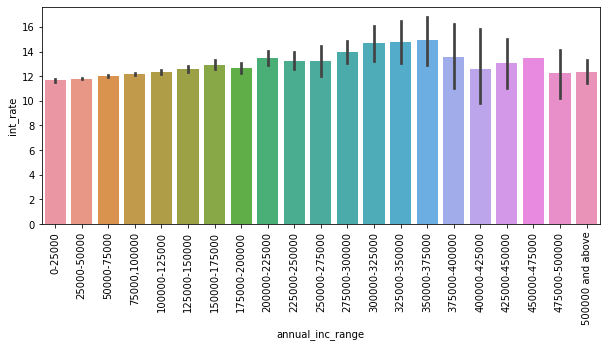

In [38]:
plt.figure(figsize=(10,4))
sns.barplot(x = loan.annual_inc_range, y = loan.int_rate,data= loan)
plt.xticks(rotation=90)
plt.show()

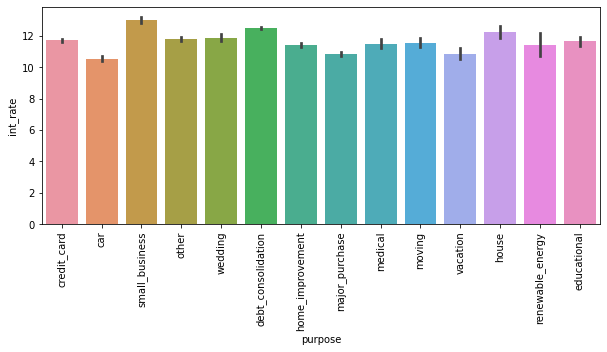

In [39]:
plt.figure(figsize=(10,4))
sns.barplot(x = loan.purpose, y = loan.int_rate,data= loan)
plt.xticks(rotation=90)
plt.show()

In [40]:
# Dividing the dataset into two dataset of  paid=Fully Paid' and defaulted='Charged Off'

paid=loan.loc[loan["loan_status"]=="Fully Paid"]
defaulted=loan.loc[loan["loan_status"]=='Charged Off']

In [41]:
# Calculating Imbalance percentage
    
# Since the majority is pain and minority is defaulted

round(len(paid)/len(defaulted),2)

5.86

In [42]:
#### The Imbalance ratio is 5.86

In [43]:
###Univariate analysis for categories

### Now, doing Categorical Univariate Analysis in logarithmic scale for paid='Fully Paid'

In [44]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

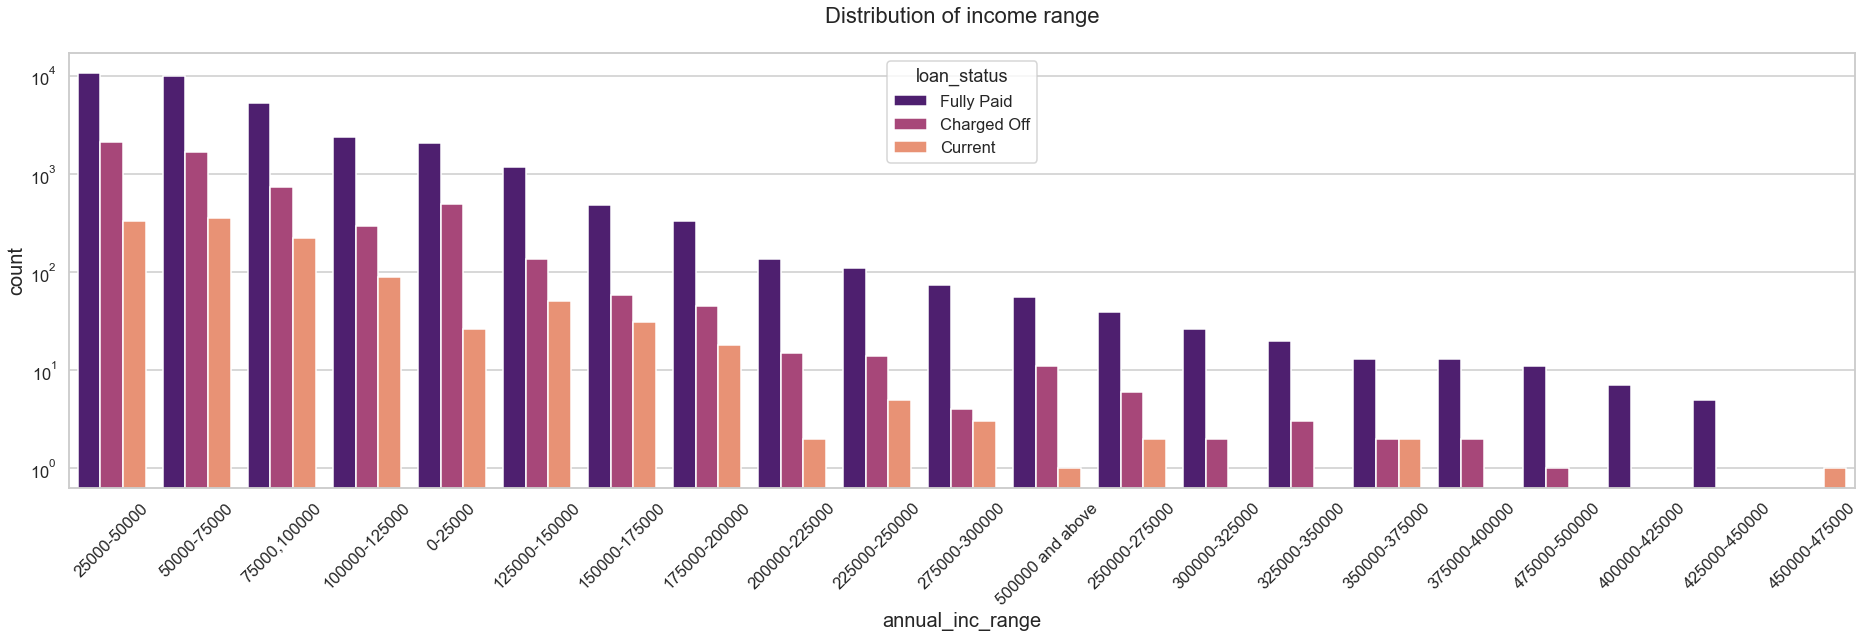

In [45]:
# PLotting for income range

uniplot(loan,col='annual_inc_range',title='Distribution of income range',hue='loan_status')

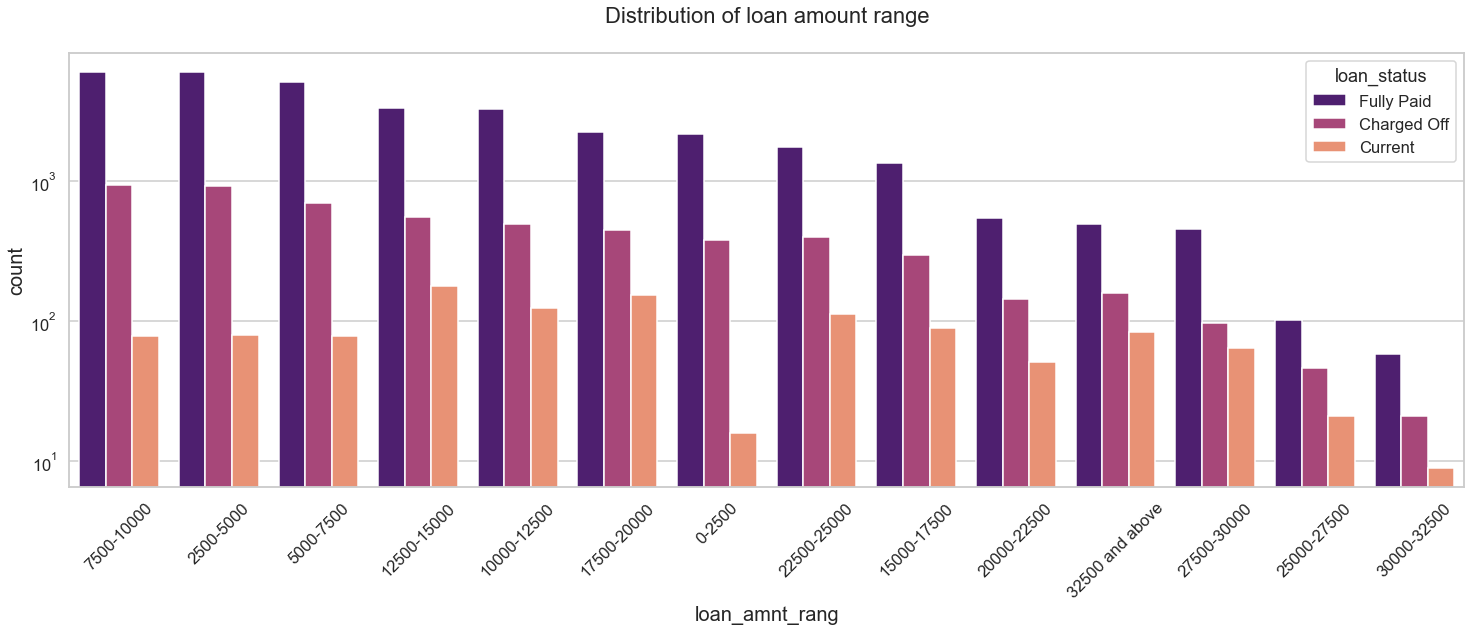

In [46]:
uniplot(loan,col='loan_amnt_rang',title='Distribution of loan amount range',hue='loan_status')

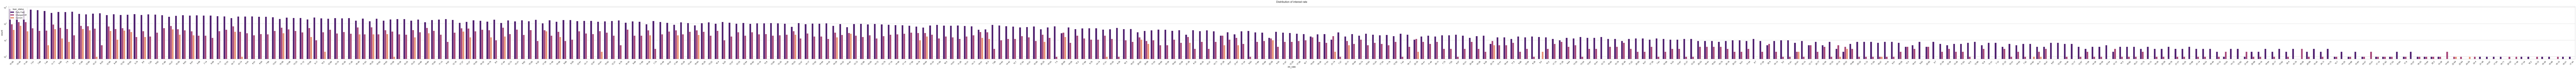

In [47]:
uniplot(loan,col='int_rate',title='Distribution of interest rate',hue='loan_status')

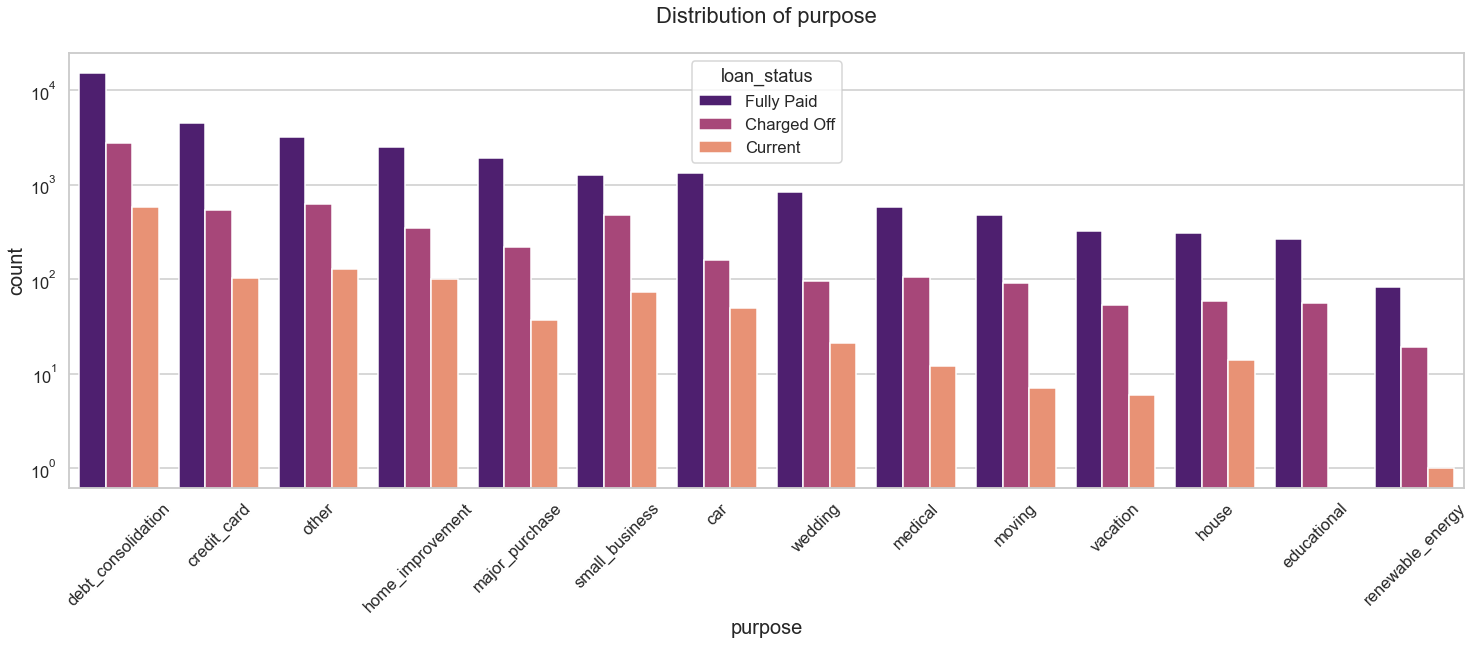

In [48]:
uniplot(loan,col='purpose',title='Distribution of purpose',hue='loan_status')

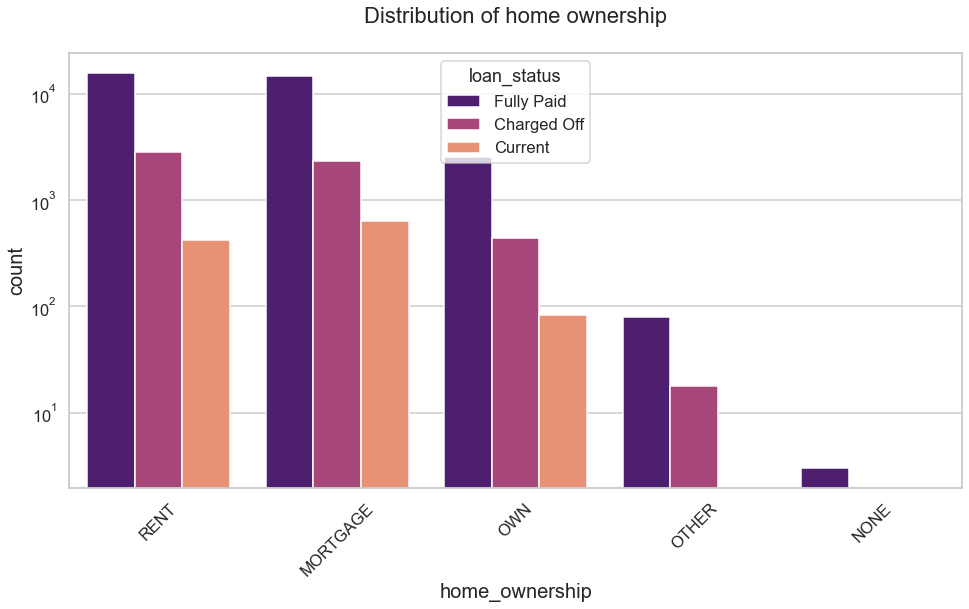

In [49]:
uniplot(loan,col='home_ownership',title='Distribution of home ownership',hue='loan_status')

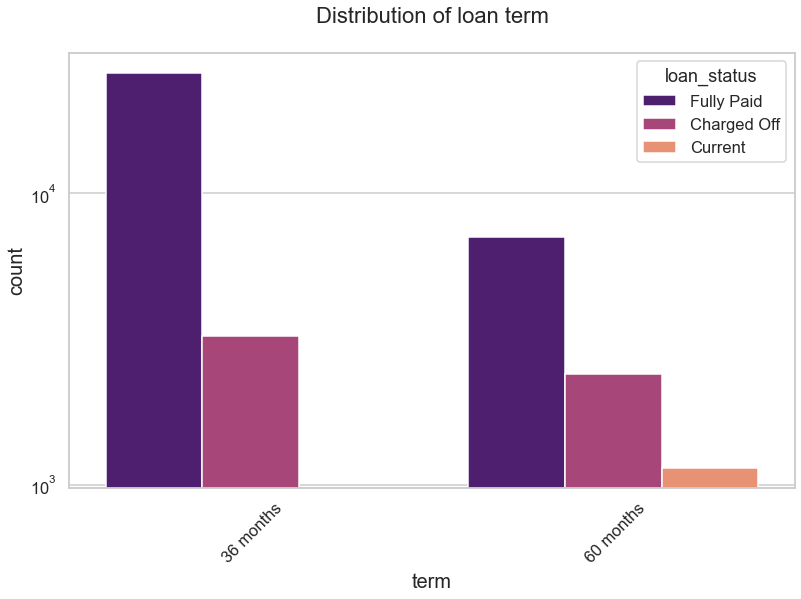

In [54]:
uniplot(loan,col='term',title='Distribution of loan term',hue='loan_status')

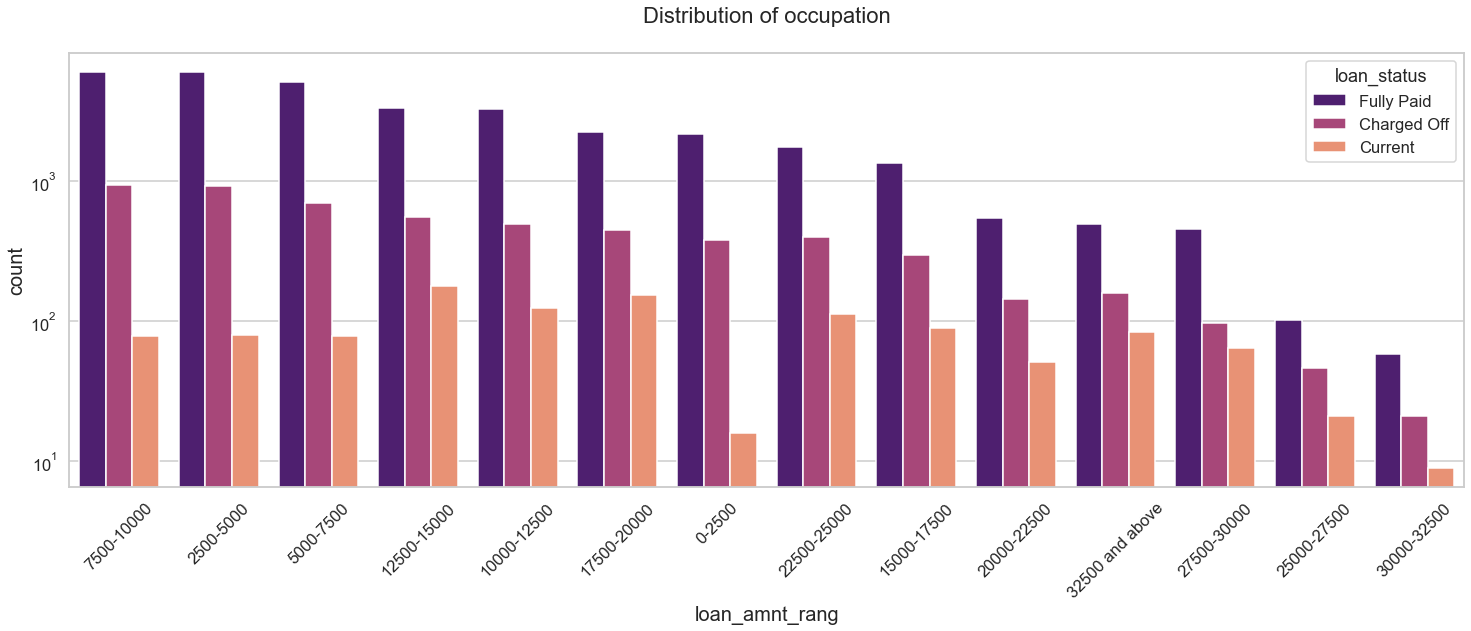

In [56]:
uniplot(loan,col='loan_amnt_rang',title='Distribution of occupation',hue='loan_status')

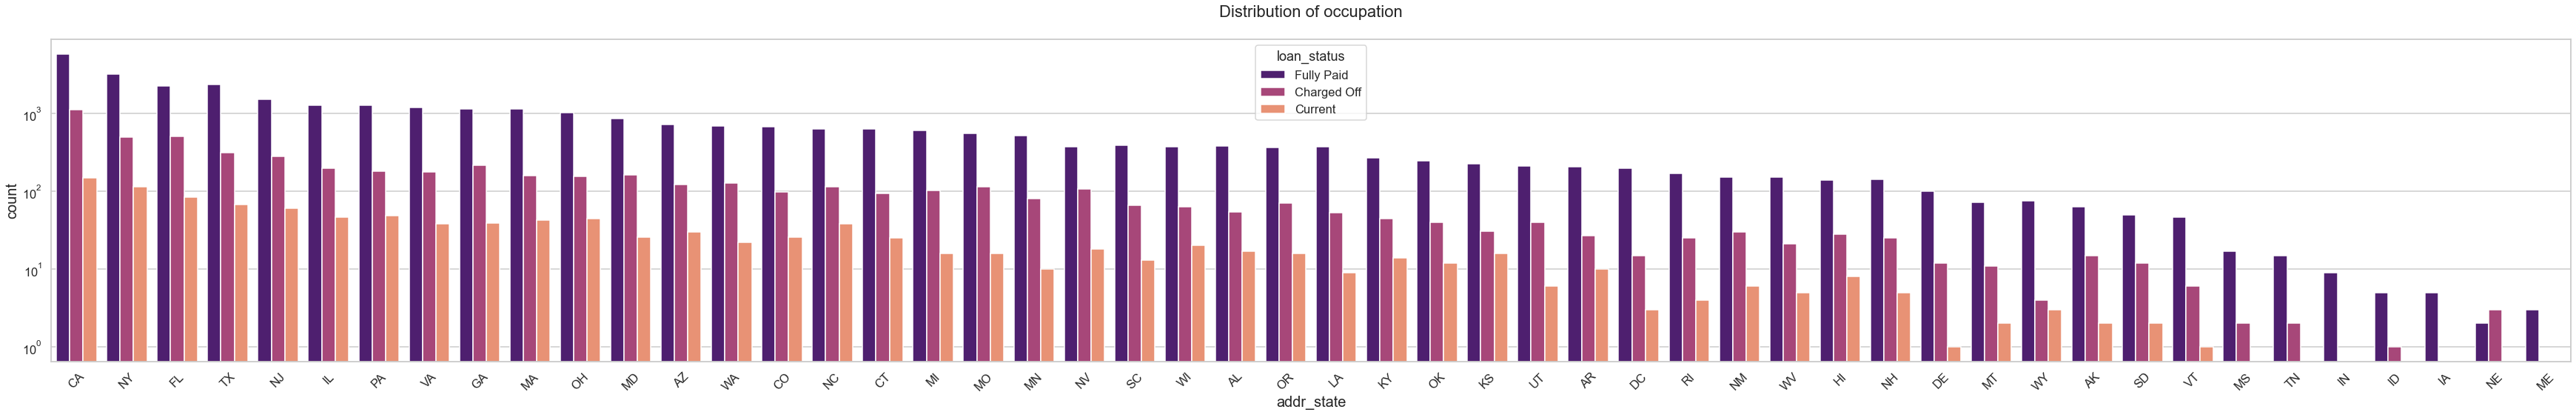

In [97]:
uniplot(loan,col='addr_state',title='Distribution of address state',hue='loan_status')

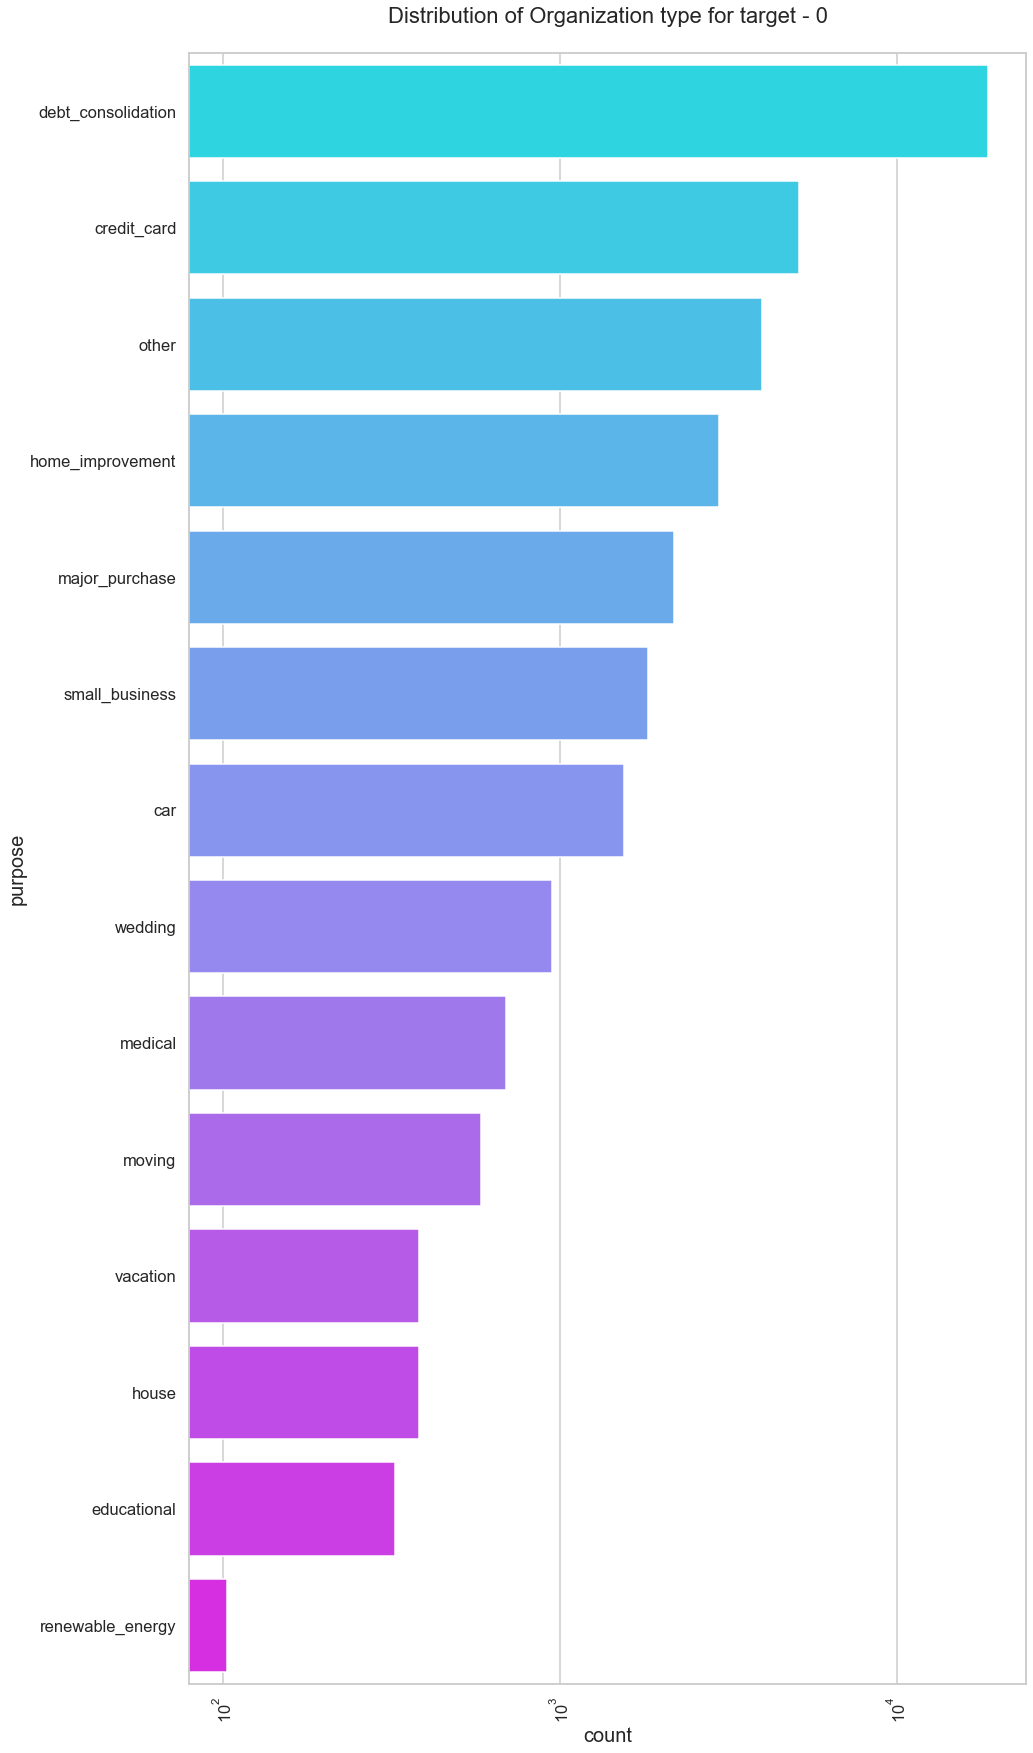

In [61]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=loan,y='purpose',order=loan['purpose'].value_counts().index,palette='cool')

plt.show()

In [60]:
# Finding some correlation for numerical columns for both target 0 and 1 

paid_corr=paid.iloc[0:,2:]
defaulted_corr=defaulted.iloc[0:,2:]

paid=paid_corr.corr(method='spearman')
defaulted=defaulted_corr.corr(method='spearman')

In [62]:
paid

,int_rate,installment,annual_inc,open_acc,revol_util,total_acc,total_pymnt
int_rate,1.000000,0.235581,0.054354,-0.034722,NaN,-0.078494,0.305722
installment,0.235581,1.000000,0.414855,0.194097,NaN,0.242172,0.960205
annual_inc,0.054354,0.414855,1.000000,0.301396,NaN,0.432028,0.410589
open_acc,-0.034722,0.194097,0.301396,1.000000,NaN,0.687622,0.196760
revol_util,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_acc,-0.078494,0.242172,0.432028,0.687622,NaN,1.000000,0.251190
total_pymnt,0.305722,0.960205,0.410589,0.196760,NaN,0.251190,1.000000


In [64]:
loan.title.describe()

count                  39717
unique                 19615
top       Debt Consolidation
freq                    2184
Name: title, dtype: object